### Quiz 3. tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 정답은 없습니다. 자유롭게 분석해보세요. 
- size는 식사 인원인것 같네요.
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)
- 지금까지 배운내용안에서 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.
- 적당한 그래프를 그려주시면 더 좋습니다.
- 반별로 제가 판단해서 가장 잘하신 과제는 다른 분들께 공유하며 제가 스타벅스 커피 삽니다.^^

In [2]:
import seaborn as sns
tips_raw = sns.load_dataset("tips")

In [3]:
tips = tips_raw.copy()

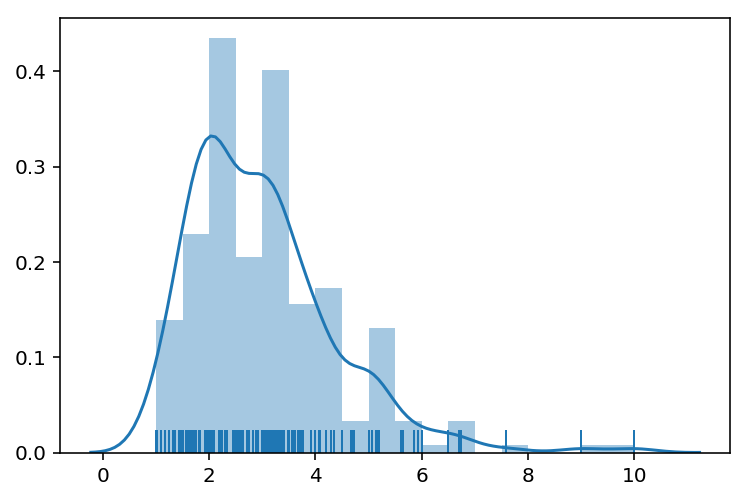

In [5]:
sns.distplot(tips.tip.values, kde = True, rug = True)

In [6]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### 예측 모델 만들어 보기
- 1. 성별 관리
    - 남성 : 0
    - 여성 : 1
- 2. 흡연 여부 :
    - 흡연자 : 0
    - 비흡연자 : 1
- 3. 요일 :
    - 목요일 : 0
    - 금요일 : 1
    - 토요일 : 2
    - 일요일 : 3
- 4. 시간대 : 
    - 점심 : 0
    - 저녁 : 1
- 5. 식사인원 : 
    각 인원수 그대로 

In [17]:
sex = tips["sex"]
sex_ls = []
for i in sex : 
    if i == "Male" :
        sex_ls.append(0)
    else :
        sex_ls.append(1)
sex_series = pd.Series(sex_ls)


In [29]:
smoker = tips["smoker"]
smoker_ls = []
for i in smoker : 
    if i == "Yes" :
        smoker_ls.append(0)
    else :
        smoker_ls.append(1)
smoker_series = pd.Series(smoker_ls)
result = pd.DataFrame(columns = ["sex", "smoker"])
result["sex"] = sex_series
result["smoker"] = smoker_series

In [31]:
day = tips["day"]
day_ls = []
for i in day :
    if i == "Thur" :
        day_ls.append(0)
    elif i == "Fri" :
        day_ls.append(1)
    elif i == "Sat" :
        day_ls.append(2)
    elif i == "Sun" :
        day_ls.append(3)
day_series = pd.Series(day_ls)

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
      ..
214    2
215    2
216    2
217    2
218    2
219    2
220    1
221    1
222    1
223    1
224    1
225    1
226    1
227    2
228    2
229    2
230    2
231    2
232    2
233    2
234    2
235    2
236    2
237    2
238    2
239    2
240    2
241    2
242    2
243    0
Length: 244, dtype: int64

In [72]:
time = tips["time"]
time_ls = []
for i in time : 
    if i == "Lunch" :
        time_ls.append(0)
    else :
        time_ls.append(1)
time_series = pd.Series(time_ls)
result = pd.DataFrame(columns = ["sex", "smoker", "day", "time"])
result["sex"] = sex_series
result["smoker"] = smoker_series
result["day"] = day_series
result["time"] = time_series
result["size"] = tips["size"]
result.tail()

,sex,smoker,day,time,size
239,0,1,2,1,3
240,1,0,2,1,2
241,0,0,2,1,2
242,0,1,2,1,2
243,1,1,0,1,2


In [73]:
left = tips.iloc[ : , 0]
last = tips.iloc[ : , 1]

right = result

In [74]:
new_tip = pd.concat([left, right], axis = 1)
new_tip.tail()


,total_bill,sex,smoker,day,time,size
239,29.03,0,1,2,1,3
240,27.18,1,0,2,1,2
241,22.67,0,0,2,1,2
242,17.82,0,1,2,1,2
243,18.78,1,1,0,1,2


In [75]:
x = np.array(new_tip)

y = np.array(last)
print(x.shape, y.shape)

(244, 6) (244,)


In [76]:
xinv = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T)
np.dot(xinv, y)

array([ 0.10016539,  0.16313951,  0.1909424 ,  0.0370762 ,  0.07924315,
        0.26223573])

<Container object of 244 artists>

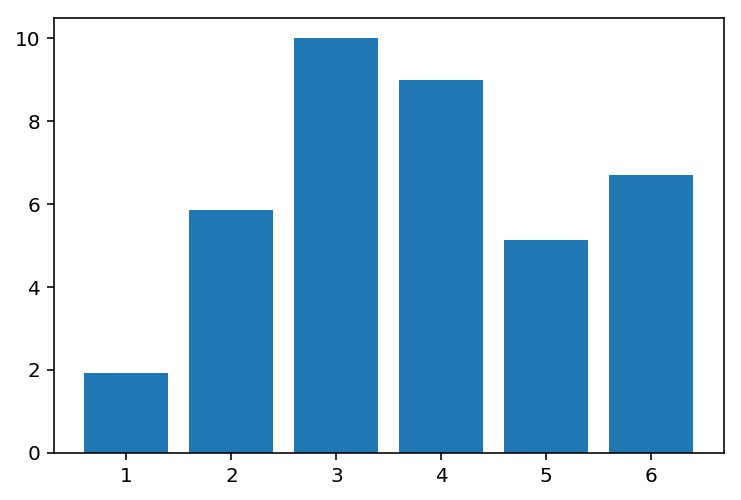

In [77]:
x_tick = tips["size"]
y_tick = tips["tip"]
plt.bar(x_tick, y_tick)